<a href="https://colab.research.google.com/github/DevMatheusBarba/Data-Science_Challenger_Alura-Store/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [99]:
print(loja.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
None


#1. Análise do faturamento



In [69]:
fat_loja_1 = round(loja.Preço.sum(), 2)
fat_loja_2 = round(loja2.Preço.sum(), 2)
fat_loja_3 = round(loja3.Preço.sum(), 2)
fat_loja_4 = round(loja4.Preço.sum(), 2)

df = pd.DataFrame({'loja': ['1', '2', '3', '4'],
    'faturamento': [fat_loja_1, fat_loja_2, fat_loja_3, fat_loja_4]})
df

,loja,faturamento
0,1,1534509.12
1,2,1488459.06
2,3,1464025.03
3,4,1384497.58


# 2. Vendas por Categoria

In [67]:
produtos_por_categoria_loja_1 = loja.groupby('Categoria do Produto')[['Produto']].count()
preco_por_categoria_loja_1 = loja.groupby('Categoria do Produto')[['Preço']].sum()
fat_categoria_loja_1 = produtos_por_categoria_loja_1.merge(preco_por_categoria_loja_1, on='Categoria do Produto').sort_values('Preço', ascending=False)
fat_categoria_loja_1.rename(columns={'Preço':'Fat p/ Categoria', 'Produto':'Qtde Vendas'}, inplace=True)

produtos_por_categoria_loja_2 = loja2.groupby('Categoria do Produto')[['Produto']].count()
preco_por_categoria_loja_2 = loja2.groupby('Categoria do Produto')[['Preço']].sum()
fat_categoria_loja_2 = produtos_por_categoria_loja_2.merge(preco_por_categoria_loja_2, on='Categoria do Produto').sort_values('Preço', ascending=False)
fat_categoria_loja_2.rename(columns={'Preço':'Fat p/ Categoria', 'Produto':'Qtde Vendas'}, inplace=True)

produtos_por_categoria_loja_3 = loja3.groupby('Categoria do Produto')[['Produto']].count()
preco_por_categoria_loja_3 = loja3.groupby('Categoria do Produto')[['Preço']].sum()
fat_categoria_loja_3 = produtos_por_categoria_loja_3.merge(preco_por_categoria_loja_3, on='Categoria do Produto').sort_values('Preço', ascending=False)
fat_categoria_loja_3.rename(columns={'Preço':'Fat p/ Categoria', 'Produto':'Qtde Vendas'}, inplace=True)

produtos_por_categoria_loja_4 = loja4.groupby('Categoria do Produto')[['Produto']].count()
preco_por_categoria_loja_4 = loja4.groupby('Categoria do Produto')[['Preço']].sum()
fat_categoria_loja_4 = produtos_por_categoria_loja_4.merge(preco_por_categoria_loja_4, on='Categoria do Produto').sort_values('Preço', ascending=False)
fat_categoria_loja_4.rename(columns={'Preço':'Fat p/ Categoria', 'Produto':'Qtde Vendas'}, inplace=True)



print(fat_categoria_loja_1.head())
print(fat_categoria_loja_2.head())
print(fat_categoria_loja_3.head())
print(fat_categoria_loja_4.head())

                       Qtde Vendas  Fat p/ Categoria
Categoria do Produto                                
eletronicos                    448         572659.23
eletrodomesticos               312         484913.36
moveis                         465         250178.11
instrumentos musicais          182         121731.69
esporte e lazer                284          52387.55
                       Qtde Vendas  Fat p/ Categoria
Categoria do Produto                                
eletronicos                    422         547773.71
eletrodomesticos               305         464758.13
moveis                         442         235234.68
instrumentos musicais          224         139987.03
esporte e lazer                275          46326.09
                       Qtde Vendas  Fat p/ Categoria
Categoria do Produto                                
eletronicos                    451         547699.92
eletrodomesticos               278         438984.89
moveis                         499         268

# 3. Média de Avaliação das Lojas


In [78]:
avaliacao_loja_1 = loja['Avaliação da compra'].mean(numeric_only=True).round(2)
avaliacao_loja_2 = loja2['Avaliação da compra'].mean(numeric_only=True).round(2)
avaliacao_loja_3 = loja3['Avaliação da compra'].mean(numeric_only=True).round(2)
avaliacao_loja_4 = loja4['Avaliação da compra'].mean(numeric_only=True).round(2)

df_avaliacao = pd.DataFrame({'loja': ['1', '2', '3', '4'],
    'avaliacao': [avaliacao_loja_1,avaliacao_loja_2,avaliacao_loja_3,avaliacao_loja_4 ]})

df_avaliacao

,loja,avaliacao
0,1,3.98
1,2,4.04
2,3,4.05
3,4,4.00


# 4. Produtos Mais e Menos Vendidos

In [98]:
top_produtos_loja_1 = loja.Produto.value_counts().sort_values(ascending=False).head(1)
top_produtos_loja_2 = loja2.Produto.value_counts().sort_values(ascending=False).head(1)
top_produtos_loja_3 = loja3.Produto.value_counts().sort_values(ascending=False).head(1)
top_produtos_loja_4 = loja4.Produto.value_counts().sort_values(ascending=False).head(1)

last_produtos_loja_1 = loja.Produto.value_counts().sort_values(ascending=False).tail(1)
last_produtos_loja_2 = loja2.Produto.value_counts().sort_values(ascending=False).tail(1)
last_produtos_loja_3 = loja3.Produto.value_counts().sort_values(ascending=False).tail(1)
last_produtos_loja_4 = loja4.Produto.value_counts().sort_values(ascending=False).tail(1)



In [97]:
df_produtos = pd.DataFrame({'loja': ['1', '2', '3', '4'],
    'top_produtos': [
        top_produtos_loja_1.index[0],
        top_produtos_loja_2.index[0],
        top_produtos_loja_3.index[0],
        top_produtos_loja_4.index[0]
    ],
    'total_vendas': [
        top_produtos_loja_1.iloc[0],
        top_produtos_loja_2.iloc[0],
        top_produtos_loja_3.iloc[0],
        top_produtos_loja_4.iloc[0]
    ],
    'last_produtos': [
        last_produtos_loja_1.index[0],
        last_produtos_loja_2.index[0],
        last_produtos_loja_3.index[0],
        last_produtos_loja_4.index[0]
    ],
    'last_total_vendas':[
              last_produtos_loja_1.iloc[0],
        last_produtos_loja_2.iloc[0],
        last_produtos_loja_3.iloc[0],
        last_produtos_loja_4.iloc[0]
    ]
})

df_produtos

,loja,top_produtos,total_vendas,last_produtos,last_total_vendas
0,1,Micro-ondas,60,Celular ABXY,33
1,2,Iniciando em programação,65,Jogo de tabuleiro,32
2,3,Kit banquetas,57,Blocos de montar,35
3,4,Cama box,62,Guitarra,33


# 5. Frete Médio por Loja

In [100]:
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [108]:
frete_loja_1 = loja['Frete'].mean(numeric_only=True).round(2)
frete_loja_2 = loja2['Frete'].mean(numeric_only=True).round(2)
frete_loja_3 = loja3['Frete'].mean(numeric_only=True).round(2)
frete_loja_4 = loja4['Frete'].mean(numeric_only=True).round(2)


In [109]:
df_frete = pd.DataFrame({'loja': ['1', '2', '3', '4'],
    'frete': [frete_loja_1, frete_loja_2, frete_loja_3, frete_loja_4]})

df_frete

,loja,frete
0,1,34.69
1,2,33.62
2,3,33.07
3,4,31.28


# Gráficos

# Faturamento das Lojas

In [137]:
df_lojas = pd.DataFrame({'loja': ['1','2','3','4'],
                          'faturamento': [fat_loja_1,fat_loja_2,fat_loja_3,fat_loja_4],
                          'avalicao': [avaliacao_loja_1,avaliacao_loja_2,avaliacao_loja_3,avaliacao_loja_4],
                          'frete': [frete_loja_1,frete_loja_2,frete_loja_3,frete_loja_4]
})

df_lojas['faturamento'] = df_lojas['faturamento'].apply(lambda x: f"R$ {x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
df_lojas

,loja,faturamento,avalicao,frete
0,1,"R$ 1.534.509,12",3.98,34.69
1,2,"R$ 1.488.459,06",4.04,33.62
2,3,"R$ 1.464.025,03",4.05,33.07
3,4,"R$ 1.384.497,58",4.00,31.28


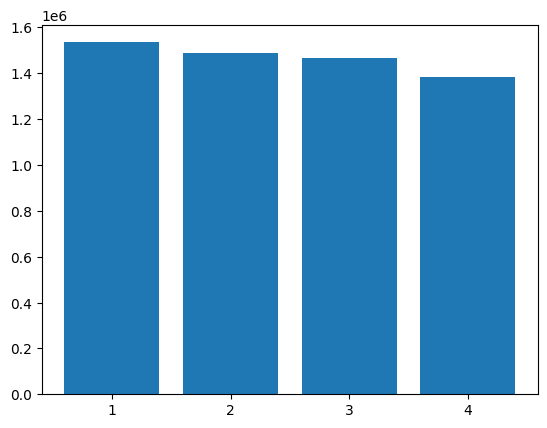

In [138]:
import matplotlib.pyplot as plt

plt.bar(
    df_lojas["loja"],
    df_lojas["faturamento"].str.replace("R$ ","").str.replace(".","").str.replace(",",".").astype(float)
)

plt.show()


# Avaliação das lojas

<Axes: ylabel='loja'>

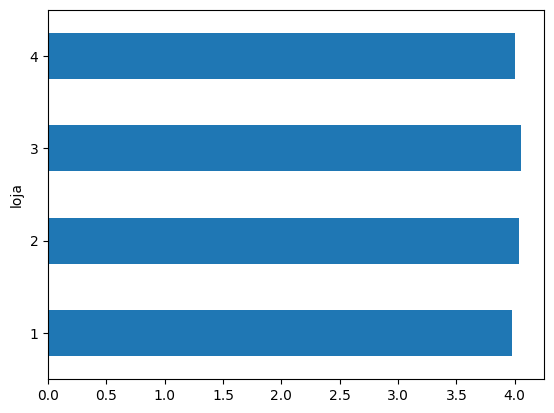

In [136]:
df_lojas.plot.barh(x="loja", y="avalicao", legend=False)



# Decisão

Devido as analises feita nas lojas na qual o senhor é dono! Chegamos a conclusão que a melhor decisão atualmente seria vender a **Loja 4** pois dentre todas as lojas, está é a que está apresentando o menor retorno finânceiro para você.... Ficando quase R$ 100.000,00 atrás dua sua terceira loja que mais da lucro! Levamos em consideração a opnião dos clientes também! na qual ela contem até um indice aceitavel de 4 estrelas... Porém para questões de negocios essa e a melhor decisão